## Loading and reading the data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Loading the dataset
leads_df=pd.read_csv("Leads.csv")

In [6]:
#Checking the data
pd.set_option('display.max_columns', None)
leads_df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
#Checking the df shape
leads_df.shape

(9240, 37)

In [8]:
#Checking df info
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# EDA

### Removing Nulls from data

The dataframe has columns with the value "Select" in them , which means that the leads haven't selected anything from the dropdown and can be replaced with nulls

In [9]:
#Replacing "Select" with Null
leads_df.replace(["Select","select"],np.NaN,inplace=True)

In [11]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [17]:
# Checking the percentage of null values in columns
null_perc= leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df.index)
null_perc

How did you hear about X Education               0.784632
Lead Profile                                     0.741883
Lead Quality                                     0.515909
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Index                       0.456494
City                                             0.397078
Specialization                                   0.365801
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Receive More U

In [22]:
#Dropping columns with >40% null values
null_cols=null_perc[null_perc>=0.4].index
leads_df=leads_df.drop(null_cols,axis=1)

In [30]:
#Checking null values after dropping the cols
leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df.index)

City                                             0.397078
Specialization                                   0.365801
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Through Recommendations                          0.000000
Receive More Updates About Our Courses           0.000000
Prospect ID                                      0.000000
Newspaper                                        0.000000
Update me on Supply Chain Content                0.000000
Get updates on DM Content                        0.000000
I agree to pay the amount through cheque         0.000000
A free copy of

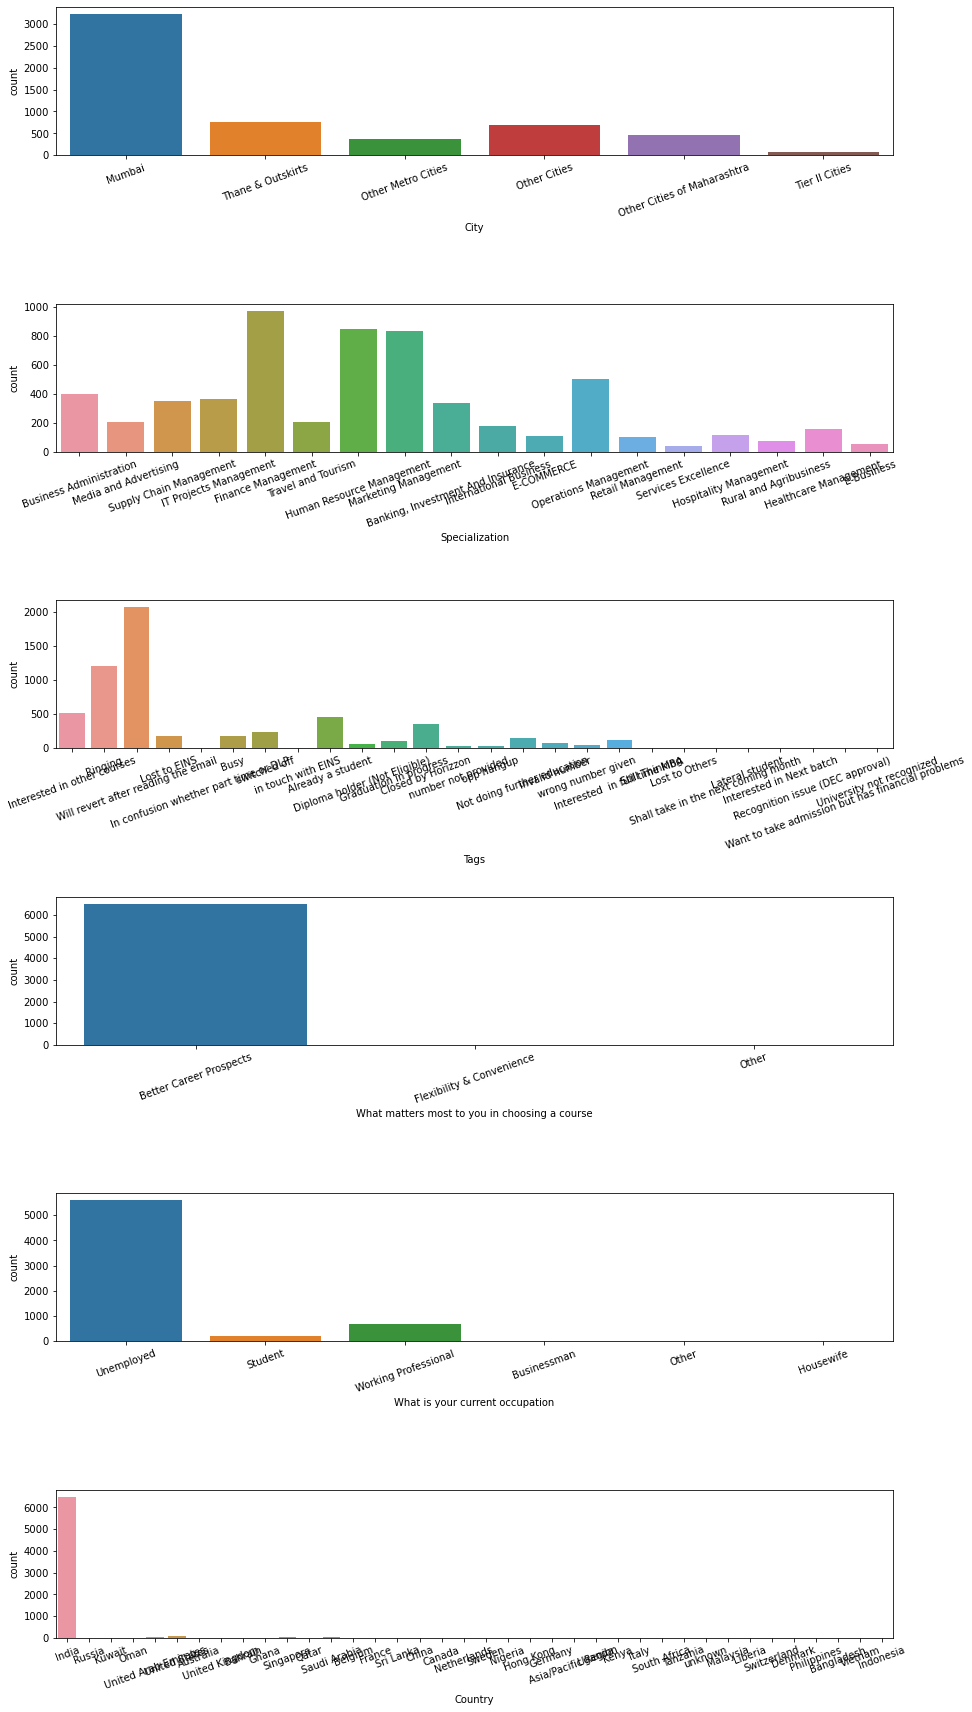

In [56]:
#Checking the columns with high null values
high_null_cols=["City","Specialization","Tags","What matters most to you in choosing a course","What is your current occupation","Country"]
plt.figure(figsize=[15,30])
x=1
plt.subplots_adjust(hspace=1)
for i in high_null_cols:
    plt.subplot(6,1,x)
    sns.countplot(data=leads_df,x=i)
    plt.xticks(rotation='20')
    x=x+1
plt.show()




In [57]:
### The columns "Country","City","What matters most to you in choosing a course","What is your current occupation" are skewed and not a lot of variance can be observed therefore can be dropped

leads_df=leads_df.drop(["Country","City","What matters most to you in choosing a course","What is your current occupation"],axis=1)

In [71]:
leads_df["Tags"]

0               Interested in other courses
1                                   Ringing
2       Will revert after reading the email
3                                   Ringing
4       Will revert after reading the email
                       ...                 
9235    Will revert after reading the email
9236                     wrong number given
9237                         invalid number
9238                                    NaN
9239    Will revert after reading the email
Name: Tags, Length: 9240, dtype: object

In [61]:
#Checking null values after dropping the cols
leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df.index)*100

Specialization                              36.580087
Tags                                        36.287879
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Prospect ID                                  0.000000
Newspaper                                    0.000000
A free copy of Mastering The Interview       0.000000
I agree to pay the amount through cheque     0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Receive More Updates About Our Courses       0.000000
Through Recommendations                      0.000000
Digital Advertisement                        0.000000
Magazine                                     0.000000
X Education Forums                           0.000000
Newspaper Article                            0.000000
Lead Number                 

In [76]:
# Imputing the columns Specialization and tags with mode will lead to bias therefore replacing the null with unknown
leads_df["Specialization"].fillna('Unknown',inplace=True)
leads_df["Tags"].fillna('Unknown',inplace=True)


In [77]:
#Checking null values after imputing the cols
leads_df.isnull().sum().sort_values(ascending=False)/len(leads_df.index)*100

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
Lead Number                                 0.000000
Search                                      0.

In [78]:
#The remaining cols have very low null percentages ~1%, therefore dropping them is a better option than trying to impute them
leads_df=leads_df.dropna()

In [80]:
leads_df.shape

(9074, 26)

In [84]:
#Dropping the Prospect ID and Lead Number cols as these are not useful in modelling
leads_df=leads_df.drop(["Prospect ID","Lead Number"],axis=1)

## Checking the other categorical variables

In [85]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Do Not Call                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Specialization                            9074 non-null   object 
 10  Search                              

In [89]:
#Checking the data in the dataset
leads_df.nunique()

Lead Origin                                    4
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1717
Page Views Per Visit                         114
Last Activity                                 17
Specialization                                19
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Tags                                          27
Update me on Supply Chain Content              1
Get updates on DM Co

In [90]:
#Dropping columns with only one value as it won't add anything to the model
leads_df=leads_df.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content", "Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)

### Analysing the categorical columns

In [95]:
#Selecting the categorical columns
cat_cols=leads_df.select_dtypes("object").columns

In [96]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

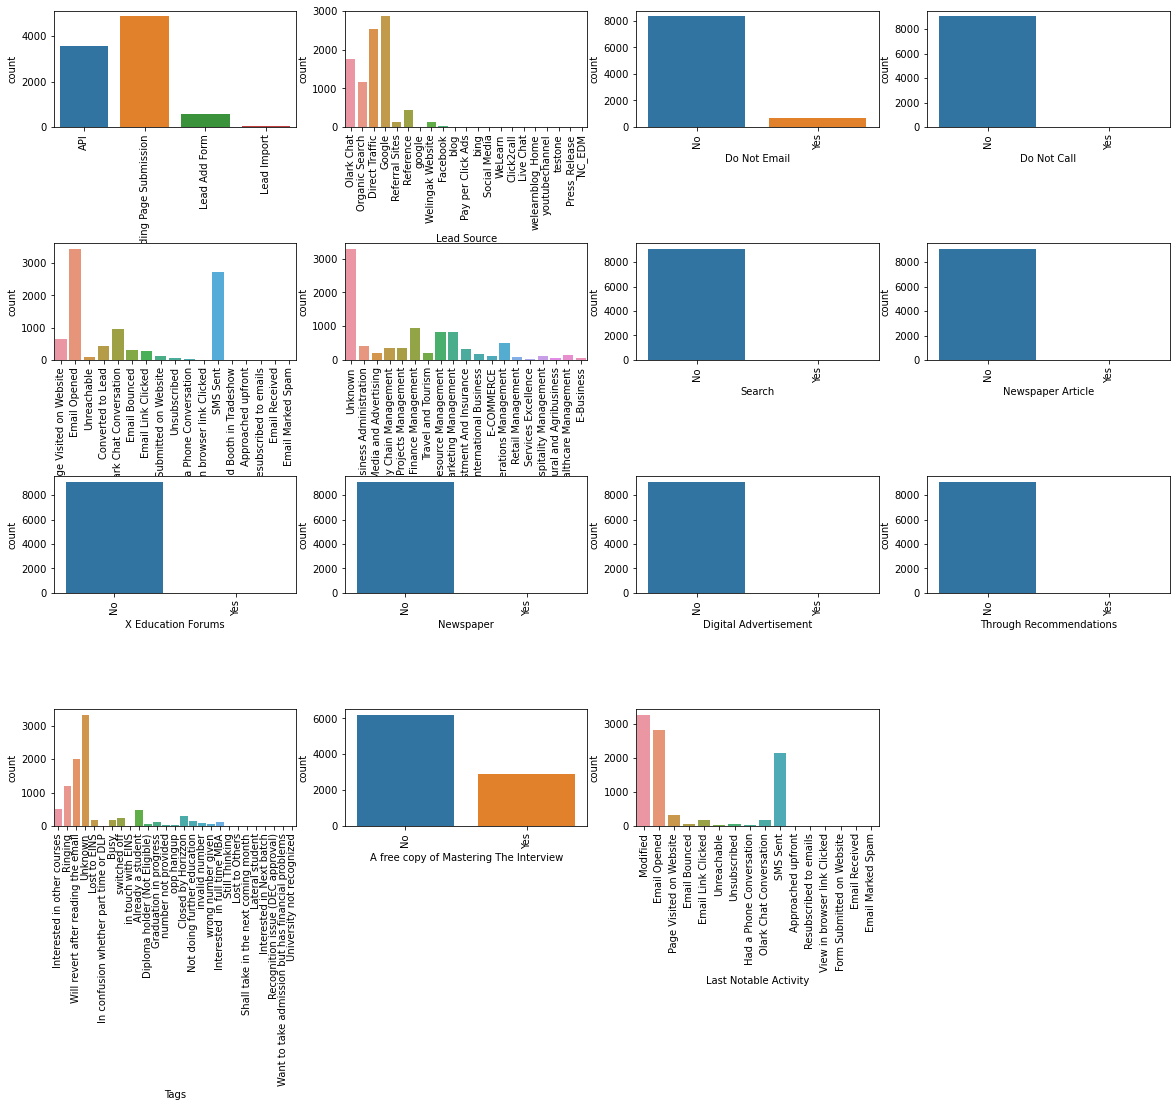

In [108]:
#Vizualizing the categorical columns
plt.figure(figsize=[20,15])
x=1
plt.subplots_adjust(hspace=1)
for i in cat_cols:
    plt.subplot(4,4,x)
    sns.countplot(data=leads_df,x=i)
    plt.xticks(rotation='90')
    x=x+1
plt.show()



In [101]:
# Checking the categorical distributions
for i in cat_cols:
    print(leads_df[i].value_counts(normalize=True),"\n")

Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: float64 

Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Social Media         0.000220
Press_Release        0.000220
Live Chat            0.000220
NC_EDM               0.000110
welearnblog_Home     0.000110
youtubechannel       0.000110
Pay per Click Ads    0.000110
blog                 0.000110
WeLearn              0.000110
testone              0.000110
Name: Lead Source, dtype: float64 

No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64 

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64 

Email Opened       

From the above plots it's evident that the following columns don't have any variance and can be dropped:
1. Do Not Email
2. Do Not Call
3. Search
4. Newspaper Article
5. X Education forms
6. Newspaper
7. Digital advertisement
8. Through Recommendations

In [109]:
#Dropping the required columns:
leads_df=leads_df.drop(['Do Not Email', 'Do Not Call',
       'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations'],axis=1)

## Analysing the numerical columns

In [121]:
num_cols=leads_df.select_dtypes(["int64","float64"]).columns

In [127]:
num_cols=num_cols.drop("Converted")
num_cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

### Checking for outliers

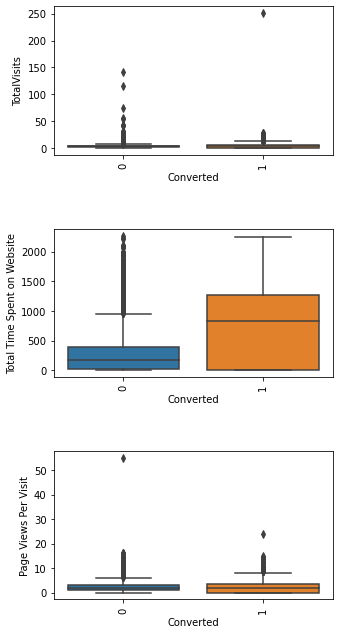

In [133]:
#Vizualizing the numerical columns
plt.figure(figsize=[5,15])
x=1
plt.subplots_adjust(hspace=0.5)
for i in num_cols:
    plt.subplot(4,1,x)
    sns.boxplot(data=leads_df,y=i,x="Converted")
    plt.xticks(rotation='90')
    x=x+1
plt.show()

From the above boxplots it's visible that the data has outliers and conversion rates are dependant on time spent on the website

In [134]:
leads_df[num_cols].describe(percentiles=[0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
50%,3.000000,246.000000,2.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


The above data shows that there are clearly outleirs in the data above the 99th percentile and can be removed

### Removing the outliers

In [154]:
leads_df=leads_df[(leads_df["Total Time Spent on Website"]<=leads_df["Total Time Spent on Website"].quantile(0.99))&(leads_df["TotalVisits"]<=leads_df["TotalVisits"].quantile(0.99))&(leads_df["Page Views Per Visit"]<=leads_df["Page Views Per Visit"].quantile(0.99))]

In [155]:
#Checking the shape of the dataframe
leads_df.shape

(8836, 11)

In [157]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8836.000000,8836.000000,8836.000000,8836.000000
mean,0.374717,3.138298,464.593821,2.264855
std,0.484077,2.897787,526.586843,1.893693
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,1.000000
50%,0.000000,3.000000,237.000000,2.000000
75%,1.000000,5.000000,885.000000,3.000000
max,1.000000,17.000000,1839.000000,9.000000


## Preparing the data for modelling

In [159]:
leads_df.nunique()

Lead Origin                                  4
Lead Source                                 21
Converted                                    2
TotalVisits                                 18
Total Time Spent on Website               1631
Page Views Per Visit                        66
Last Activity                               17
Specialization                              19
Tags                                        27
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [163]:
leads_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Interested in other courses,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Ringing,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Will revert after reading the email,0,Modified


In [160]:
# Creating binary mapping
leads_df["A free copy of Mastering The Interview"]=leads_df["A free copy of Mastering The Interview"].map(lambda x: 1 if x=="Yes" else 0)

In [172]:
#creating dummy variables
dummy=pd.get_dummies(leads_df[cat_cols],drop_first=True)

In [175]:
#Adding the dummy data to the leads dataframe
leads_df=pd.concat([leads_df,dummy],axis=1)

In [ ]:
#Dropping the categorical columns
leads_df.drop([cat_cols],axis=)

In [177]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8836 entries, 0 to 9239
Columns: 109 entries, Lead Origin to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(3), object(6), uint8(98)
memory usage: 1.6+ MB


In [ ]:
dropping t